#  Real Staate - Price Prediction

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt

In [2]:
housing = pd.read_csv('data.csv')
print(housing.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [3]:
#since there is no missing values we dont have to take care of missing values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
#lets undersatnd describe funtion to understand data 
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287248,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705130,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#lets analyse data using histogram
#housing.hist(bins=50 , figsize = (30,20))

## Train Test Splitting

In [6]:
#creating my own split_train_test function which is already available in scikit learn
#def split_train_test(data , test_ratio):
#    shuffled = np.random.permutation(len(data))
#    test_set_size = int(len(data) * test_ratio)
#    test_indices = shuffled[:test_set_size]
#    train_indices = shuffled[test_set_size :]
#    return data.iloc[train_indices] , data.iloc[test_indices]
#train_set , test_set = split_train_test(housing , 0.2)
#print("Number of Rows in Train set : " , len(train_set), "\nNumber of rows in Test set : " , len(test_set))

In [7]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing , test_size = 0.2 , random_state = 42)
print("Number of Rows in Train set : " , len(train_set), "\nNumber of rows in Test set : " , len(test_set))

Number of Rows in Train set :  404 
Number of rows in Test set :  102


In [8]:
#here we use stratifies splitting to make sure data is distrubuted properly
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2 , random_state = 42 )
for train_index , test_index in split.split(housing , housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [9]:
strat_test_set['CHAS'].value_counts()
housing.shape  # housing before using using imputer or updating missing value

(506, 14)

In [10]:
housing = strat_train_set.copy()
housing.shape

(404, 14)

## looking for correlatioons

In [11]:
corr_matrix = housing.corr()

corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679436
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000199D983CAC0>,
      dtype=object)

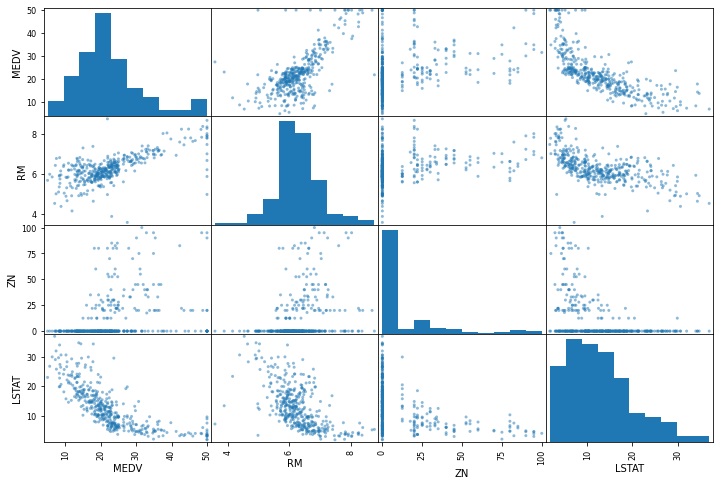

In [12]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV" , "RM"  , "ZN" , "LSTAT"]
scatter_matrix(housing[attributes] , figsize = (12,8))

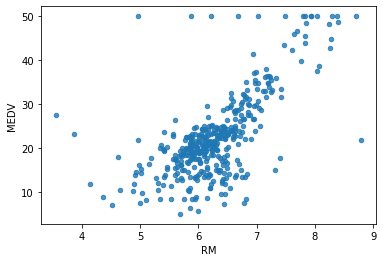

In [13]:
housing.plot(kind = 'scatter', x= "RM" , y= "MEDV", alpha = 0.8)

In [14]:
housing['TAXRM'] = housing['TAX'] / housing['RM'] #after doing this we cxan see that there is very good negative correlation with TAXRM
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)
print(housing.head())

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
254  0.04819  80.0   3.64     0  0.392  6.108  32.0  9.2203    1  315   
348  0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
476  4.87141   0.0  18.10     0  0.614  6.484  93.6  2.3053   24  666   
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
326  0.30347   0.0   7.38     0  0.493  6.312  28.9  5.4159    5  287   

     PTRATIO       B  LSTAT  MEDV       TAXRM  
254     16.4  392.89   6.57  21.9   51.571709  
348     17.0  390.94   5.99  24.5   42.200452  
476     20.2  396.21  18.68  16.7  102.714374  
321     19.6  396.90   6.87  23.1   45.012547  
326     19.6  396.90   6.15  23.0   45.468948  


In [15]:
housing = strat_train_set.drop("MEDV", axis=1) #training set
housing_labels = strat_train_set['MEDV'].copy() #test set


## taking care of missing data points
1.get rid of missing datapoint
2.get rid of the whole attribute
3.set the value to some value 

In [16]:
a =  housing.dropna(subset = ['RM']) #get rid of missing datapoint 
a.shape

(400, 13)

In [17]:
a = housing.drop("RM", axis = 1) # get rid of the whole attribute
a.shape
#note that we are left with only 14 columns and original dataframe will remain unchanged

(404, 12)

In [18]:
#set the value to some value
#here we wil replace the null values with mean of the RM attribute 
median = housing.RM.median()
print(median)
housing['RM'].fillna(median)
#note that we are left with only 14 columns and original dataframe will remain unchanged

6.2135


254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)
imputer.statistics_ #creates median for all the columns 

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [20]:
x = imputer.transform(housing)
housing_tr = pd.DataFrame(x , columns = housing.columns) 
housing_tr.describe()  
housing_tr.shape

(404, 13)

## scikit learn design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


## creating pipeline

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [23]:
some_labels = housing_labels.iloc[:5]# lets check predition for these five rows
some_data = housing.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.238, 25.485, 16.675, 23.332, 23.486])

In [24]:
some_labels  # it is giving good prediction

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

## lets calculate rmse(root mean squared error)

In [25]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
print(rmse)

1.2007022604779376


## Using better evaluation technique - Cross Validation

In [37]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [36]:
rmse_scores

array([2.60187746, 3.11543519, 5.09170213, 2.73812465, 2.49021807,
       3.29950035, 2.54898972, 4.78397556, 3.12810802, 4.0058025 ,
       2.48635532, 2.97696227])

In [28]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [29]:
print_scores(rmse_scores)

Scores: [2.83176734 2.80460053 4.3249597  2.54047315 3.38021001 2.48439488
 4.65427984 3.30934786 3.03749921 3.53229797]
Mean:  3.2899830488488333
Standard deviation:  0.6870049575526836


## saving the model

In [30]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test data

In [31]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [32]:
final_rmse

2.9404618534789226

In [33]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24413804, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## using the model

In [34]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([24.547])